In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataframe_exercicio_modulo_9.csv")
df

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,GT3,T,1,3,no,no,no,yes,yes,no,5,4,2,4,10
1040,F,18,LE3,T,1,2,no,yes,no,no,yes,no,4,3,4,4,16
1041,F,18,GT3,T,2,2,no,no,no,yes,no,no,1,1,1,6,9
1042,M,17,LE3,T,2,1,no,no,no,no,yes,no,2,4,5,6,10


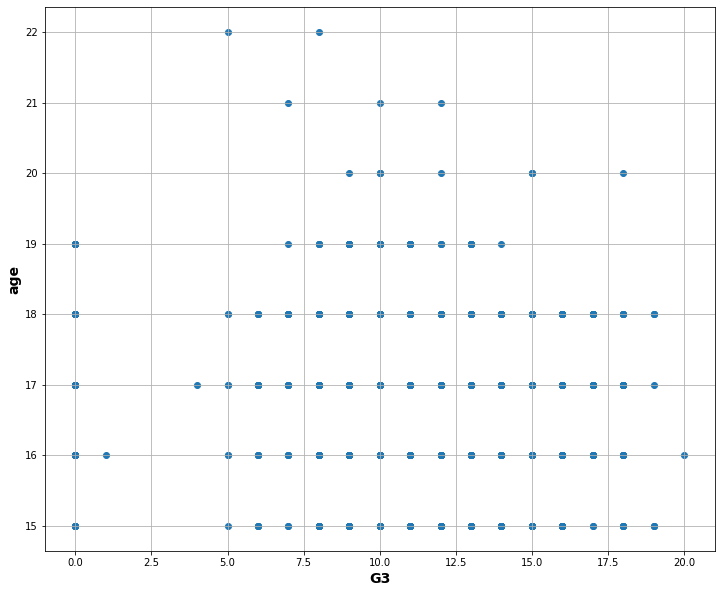

In [11]:
plt.figure(figsize=[12,10])
plt.scatter(df.G3, df.age)
plt.xlabel("G3", fontsize = 14, fontweight = 'bold')
plt.ylabel("age", fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

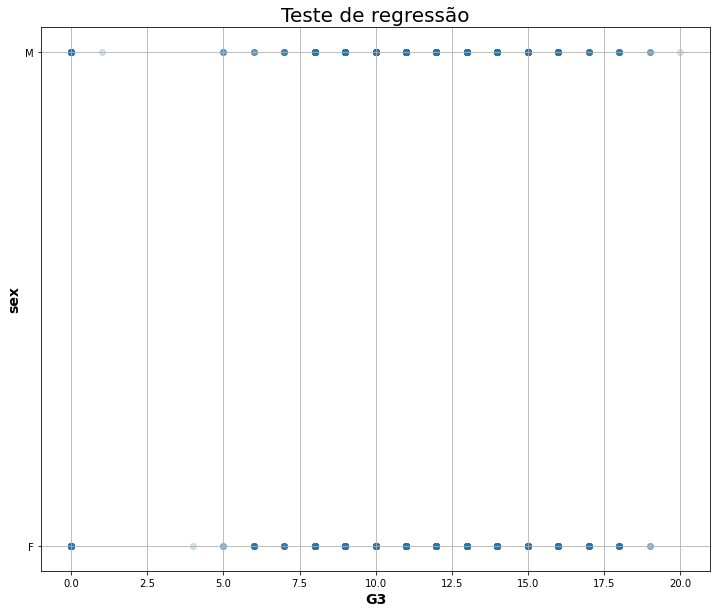

In [12]:
plt.figure(figsize=[12,10])
plt.scatter(df.G3, df.sex, alpha = 0.2)
plt.title("Teste de regressão", fontsize = 20)
plt.xlabel("G3", fontsize = 14, fontweight = 'bold')
plt.ylabel("sex", fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

In [13]:
df.corr()['G3']

age          -0.125282
traveltime   -0.102627
studytime     0.161629
famrel        0.054461
freetime     -0.064890
goout        -0.097877
absences     -0.045671
G3            1.000000
Name: G3, dtype: float64

In [14]:
from  sklearn.linear_model import LinearRegression

In [15]:
lm_exp = LinearRegression()

In [ ]:
plt.figure(figsize=[10,8])
plt.scatter(df.G3, df.sex)
plt.title("Regressão linear", fontsize = 16, fontweight = 'bold')
plt.xlabel("G3", fontsize = 14, fontweight = 'bold')
plt.ylabel("sex", fontsize = 14, fontweight = 'bold')
plt.grid()

xlims = np.arange(0,12)
plt.plot(xlims, lm_exp.predict(xlims.reshape(-1,1)), c = 'black', lw = 3, label = 'Reg. Linear')
plt.legend()
plt.show()

In [ ]:
def preprocessamento_completo(df, dataset_de_treino = True, cat_encoder = None, std_scaler = None):

    dff = df.copy()

    
    dff["sex"] = dff["sex"]/dff["G3"]
    dff["age"] = dff["age"]/dff["G3"]
    dff["famsize"]= dff["famsize"]/dff["G3"]

    
    dff = dff.dropna(axis = 0)
    
    variaveis_para_normalizar = ['sex',
                                 'age',
                                'famsize',
                                 'Pstatus',
                                 'traveltime',
                                 'studytime',
                                 'schoolsup',
                                 'famsup',
                                 'paid',
                                 'activities',
                                 'internet',
                                 'romatic',
                                 'famrel',
                                 'freetime',
                                 'goout',
                                 'absences',
                                 'G3'
                                            ]

    if dataset_de_treino:  
        
        
        encoder = OneHotEncoder()
        df_prox_mar_OHE = encoder.fit_transform(dff[['G3']]).toarray()

        
        sc = StandardScaler()
        variaveis_norm = sc.fit_transform(dff[variaveis_para_normalizar])
        
        X, y =  np.c_[G3_OHE, variaveis_norm], dff.sex.values
        return X, y, encoder, sc
    
    else:
        
        df_G3_OHE = cat_encoder.transform(dff[['G3']]).toarray()
        
        
        variaveis_norm = std_scaler.transform(dff[variaveis_para_normalizar]) 
        
        X, y =  np.c_[df_G3_OHE, variaveis_norm], dff.sex.values
        return X, y